<a href="https://colab.research.google.com/github/mjavadpur/LSTM/blob/main/StockMarketSaipa_S3_MJavadpur.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Import Libraries**

In [53]:
from pandas.io.api import read_csv
import math
import pandas as pd
from pandas_datareader import data as pdr
import yfinance as yfin

yfin.pdr_override()

import numpy as np
import os
import io
import seaborn as sns

from sklearn.preprocessing import MinMaxScaler 
from keras.models import Sequential
from keras.layers import Dense , LSTM

import matplotlib.pyplot as plt

import cv2
from google.colab.patches import cv2_imshow


# **Read Data**

In [59]:
# from google.colab import files
# uploaded = files.upload()

from google.colab import drive
drive.mount('/content/drive')





Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [55]:
%cd /content/drive/MyDrive/Workshop/StockMarkettingLSTM

/content/drive/MyDrive/Workshop/StockMarkettingLSTM


In [147]:
df = pd.read_csv('S_Saipa.csv',index_col='<DTYYYYMMDD>', parse_dates=True)
df = df.sort_index()
df = df.iloc[df.index.year>2004]
df.shape

(3878, 11)

In [148]:
df.tail()

,<TICKER>,<FIRST>,<HIGH>,<LOW>,<CLOSE>,<VALUE>,<VOL>,<OPENINT>,<PER>,<OPEN>,<LAST>
<DTYYYYMMDD>,,,,,,,,,,,
2023-04-19,S*Saipa,3270.0,3376.0,3215.0,3295.0,3429210337023,1040767583,29366,D,3225.0,3288.0
2023-04-24,S*Saipa,3330.0,3459.0,3201.0,3372.0,2860131000666,848298718,24523,D,3295.0,3417.0
2023-04-25,S*Saipa,3480.0,3532.0,3223.0,3365.0,3032615689991,901224382,28088,D,3372.0,3259.0
2023-04-26,S*Saipa,3250.0,3349.0,3197.0,3234.0,4070439741595,1258767829,34032,D,3365.0,3197.0
2023-04-29,S*Saipa,3200.0,3292.0,3171.0,3227.0,2782442213626,862264150,28556,D,3234.0,3227.0


In [149]:
df.head()

,<TICKER>,<FIRST>,<HIGH>,<LOW>,<CLOSE>,<VALUE>,<VOL>,<OPENINT>,<PER>,<OPEN>,<LAST>
<DTYYYYMMDD>,,,,,,,,,,,
2005-01-01,S*Saipa,5301.0,5600.0,5301.0,5568.0,689474824,129243,58,D,5580.0,5568.0
2005-01-02,S*Saipa,5449.0,5532.0,5290.0,5532.0,2081357209,391391,86,D,5568.0,5532.0
2005-01-03,S*Saipa,5426.0,5511.0,5256.0,5511.0,1456996968,273786,82,D,5532.0,5511.0
2005-01-04,S*Saipa,5330.0,5501.0,5236.0,5501.0,658318059,124354,56,D,5511.0,5501.0
2005-01-05,S*Saipa,5230.0,5456.0,5226.0,5456.0,2692322972,512062,124,D,5501.0,5456.0


# **Fonts**

In [150]:
max = df['<CLOSE>'].max()
df['<CLOSE>'][df['<CLOSE>'] == max]

<DTYYYYMMDD>
2005-06-22    6136.0
Name: <CLOSE>, dtype: float64

In [73]:

fontx = {
    "family": "serif",
    "color": "darkred",
    "weight": "normal",
    "size": 26,
}
fonty = {
    "family": "serif",
    "color": "darkred",
    "weight": "normal",
    "size": 26,
}




# **Columns**

In [74]:

cols = df.columns.to_list()

print(cols)



['<TICKER>', '<FIRST>', '<HIGH>', '<LOW>', '<CLOSE>', '<VALUE>', '<VOL>', '<OPENINT>', '<PER>', '<OPEN>', '<LAST>']


# **Visualizing Data**

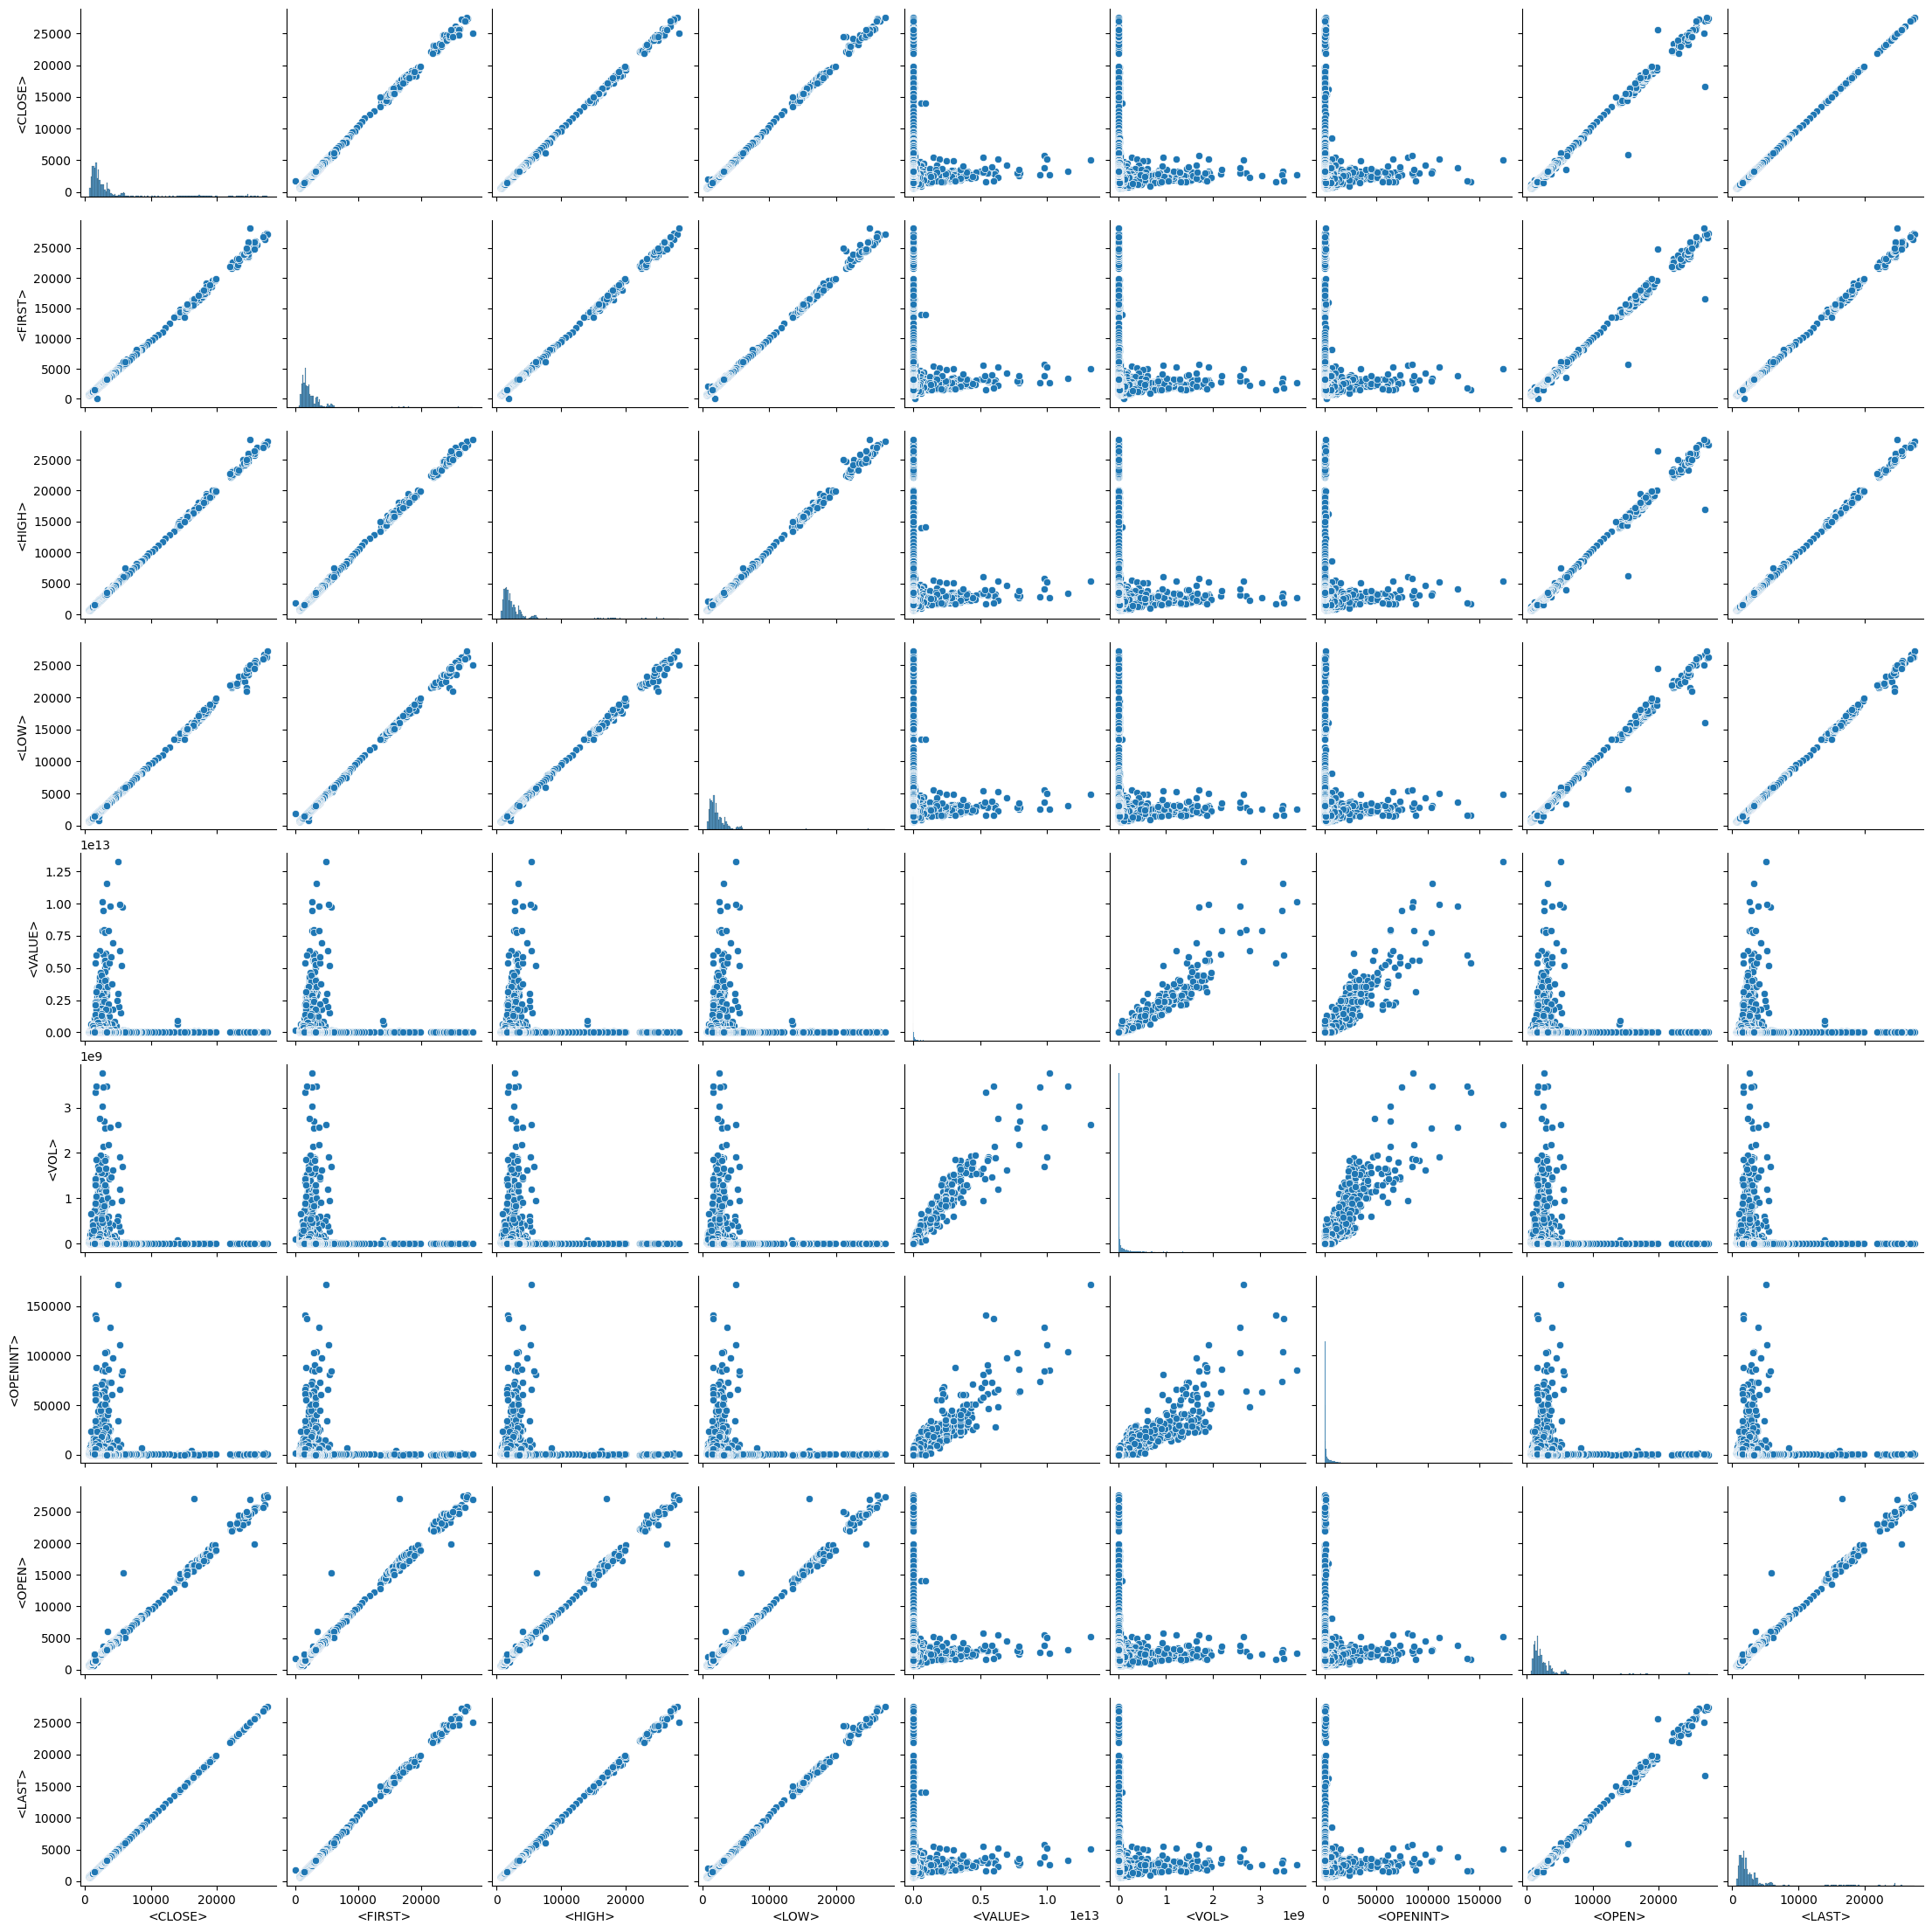

In [8]:
sns.pairplot(df[['<CLOSE>', '<FIRST>', '<HIGH>', '<LOW>','<VALUE>', '<VOL>', '<OPENINT>', '<PER>', '<OPEN>', '<LAST>']])

<Axes: xlabel='<DTYYYYMMDD>', ylabel='<CLOSE>'>

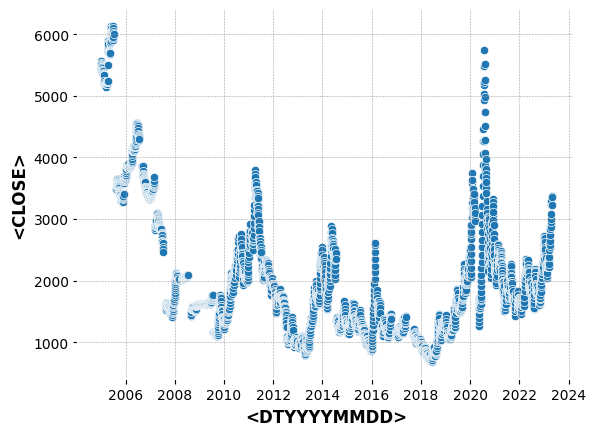

In [151]:
sns.scatterplot(data=df, x='<DTYYYYMMDD>', y='<CLOSE>')

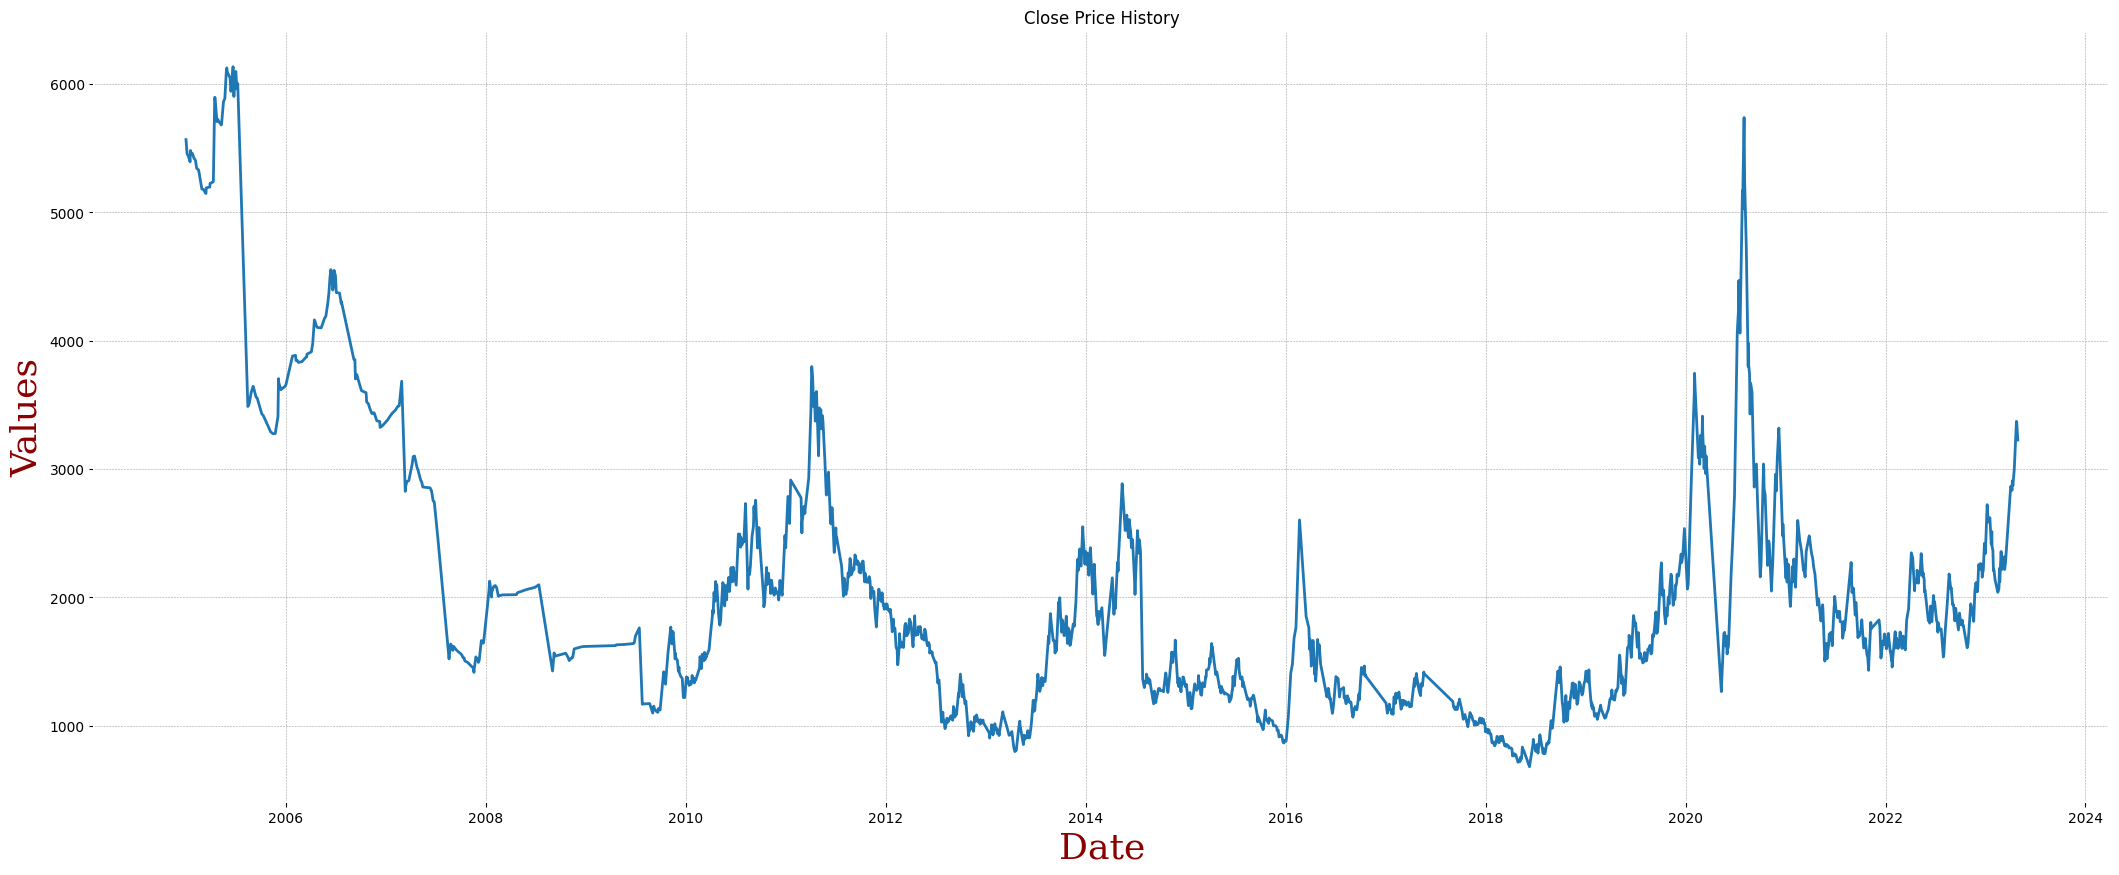

In [152]:

y = df['<CLOSE>']
x = df.index.name
plt.figure(figsize=(26,10))
plt.title('Close Price History')
plt.plot(df.index,df['<CLOSE>'])
plt.xlabel('Date', fontdict = fontx)
plt.ylabel('Values', fontdict = fonty)
plt.show()

### **Change Column NAME**

In [77]:
data=df.rename(columns={'<OPEN>':'Open', '<HIGH>': 'High','<LOW>': 'Low', 
                       '<CLOSE>' : 'Close','<VOL>':'Volume'}, errors="raise")

data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 4610 entries, 2001-05-06 to 2023-04-29
Data columns (total 11 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   <TICKER>   4610 non-null   object 
 1   <FIRST>    4610 non-null   float64
 2   High       4610 non-null   float64
 3   Low        4610 non-null   float64
 4   Close      4610 non-null   float64
 5   <VALUE>    4610 non-null   int64  
 6   Volume     4610 non-null   int64  
 7   <OPENINT>  4610 non-null   int64  
 8   <PER>      4610 non-null   object 
 9   Open       4610 non-null   float64
 10  <LAST>     4610 non-null   float64
dtypes: float64(6), int64(3), object(2)
memory usage: 432.2+ KB


### **Filter Data**

In [19]:
dt_range = pd.date_range(start="20210301", end="20210331")
data = data[data.index.isin(dt_range)]
data.head()

,<TICKER>,<FIRST>,High,Low,Close,<VALUE>,Volume,<OPENINT>,<PER>,Open,<LAST>
<DTYYYYMMDD>,,,,,,,,,,,
2021-03-31,S*Saipa,2410.0,2430.0,2410.0,2410.0,111687204640,46336832,1444,D,2450.0,2410.0
2021-03-30,S*Saipa,2470.0,2480.0,2440.0,2450.0,875005528720,357589439,9664,D,2480.0,2440.0
2021-03-28,S*Saipa,2500.0,2560.0,2420.0,2480.0,1976687235670,796064822,21905,D,2450.0,2460.0
2021-03-27,S*Saipa,2370.0,2500.0,2320.0,2450.0,3538354930270,1441935998,29969,D,2360.0,2500.0
2021-03-17,S*Saipa,2420.0,2440.0,2310.0,2360.0,1563676482280,663319616,19058,D,2350.0,2330.0


In [20]:
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 17 entries, 2021-03-31 to 2021-03-01
Data columns (total 11 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   <TICKER>   17 non-null     object 
 1   <FIRST>    17 non-null     float64
 2   High       17 non-null     float64
 3   Low        17 non-null     float64
 4   Close      17 non-null     float64
 5   <VALUE>    17 non-null     int64  
 6   Volume     17 non-null     int64  
 7   <OPENINT>  17 non-null     int64  
 8   <PER>      17 non-null     object 
 9   Open       17 non-null     float64
 10  <LAST>     17 non-null     float64
dtypes: float64(6), int64(3), object(2)
memory usage: 1.6+ KB


### **Plot Candlestick with mlpfinance library**




In [14]:
!pip install mplfinance

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 73.1/73.1 kB 5.2 MB/s eta 0:00:00


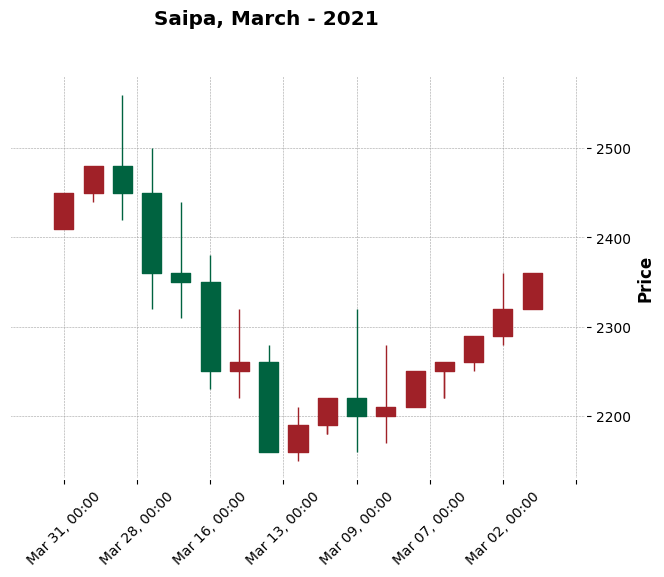

In [21]:
import mplfinance as fplt

fplt.plot(
            data,
            type='candle',
            style='charles',
            title='Saipa, March - 2021',
            ylabel='Price'
        )

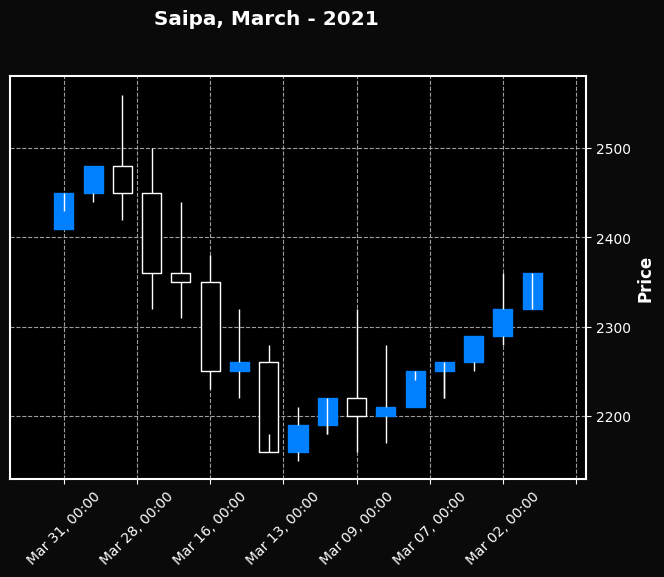

In [22]:
fplt.plot(
            data,
            type='candle',
            style='mike',
            title='Saipa, March - 2021',
            ylabel='Price',
        )

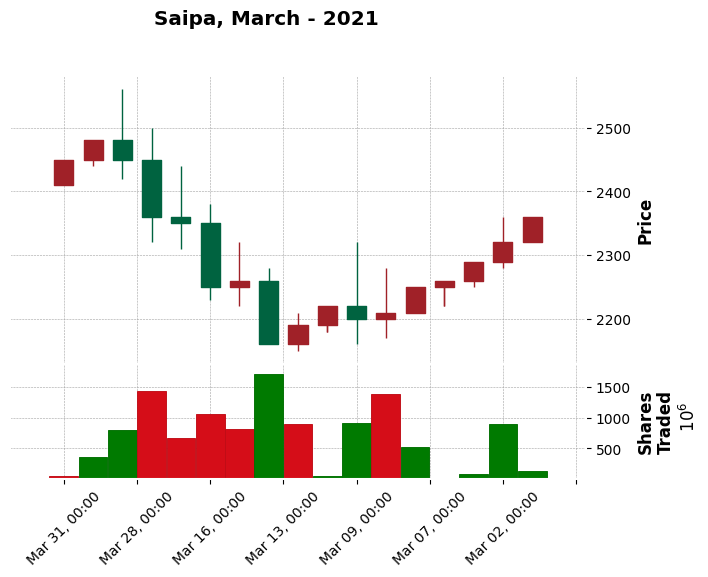

In [23]:
fplt.plot(
            data,
            type='candle',
            style='charles',
            title='Saipa, March - 2021',
            ylabel='Price',
            volume=True,
            ylabel_lower='Shares\nTraded',
            )

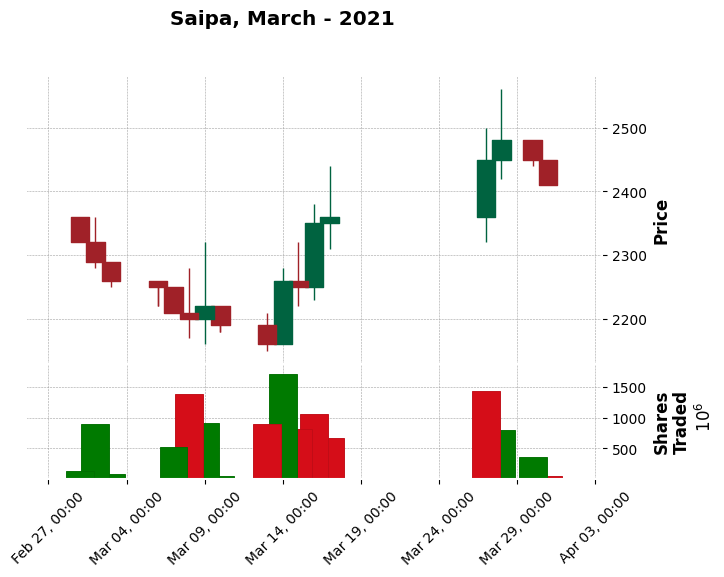

In [24]:
fplt.plot(
            data,
            type='candle',
            style='charles',
            title='Saipa, March - 2021',
            ylabel='Price',
            volume=True,
            ylabel_lower='Shares\nTraded',
            show_nontrading=True
            )

remove last data for Final test

In [108]:
df.shape

(4609, 11)

In [153]:



data = df.filter(['<CLOSE>'])

dataset = data.values

trainingDataLen = math.ceil(len(dataset)*.8)

scalar = MinMaxScaler(feature_range=(0,1))

scaled_data = scalar.fit_transform(dataset)


print(scaled_data.shape)

(3878, 1)


In [154]:


train_data = scaled_data[0:trainingDataLen,:]

x_train = []
y_train = []


for i in range(60,len(train_data)):
  x_train.append(train_data[i-60:i,0])
  y_train.append(train_data[i,0])


type(x_train)

  

list

In [155]:
x_train , y_train = np.array(x_train) ,np.array(y_train) 

type(x_train)

numpy.ndarray

In [156]:
x_train = np.reshape(x_train,(x_train.shape[0],x_train.shape[1],1))

x_train.shape

(3043, 60, 1)

In [157]:

model = Sequential()

model.add(LSTM(50,return_sequences=True,input_shape=(x_train.shape[1],1)))

model.add(LSTM(50,return_sequences=False))

model.add(Dense(25))

model.add(Dense(1))


In [158]:
model.compile(optimizer='adam',loss='mean_squared_error')


In [159]:
model.fit(x_train,y_train,batch_size=1,epochs=1)



3043/3043 [==============================] - 115s 37ms/step - loss: 0.0019


In [160]:
test_data=scaled_data[trainingDataLen-60:,:]
print(len(test_data))
x_test=[] 
y_test=dataset[trainingDataLen:,:]
print(len(test_data))
for i in range(60,len(test_data)):
  x_test.append(test_data[i-60:i,0])
  

835
835


In [161]:
x_test=np.array(x_test)

In [162]:
x_test=np.reshape(x_test,(x_test.shape[0],x_test.shape[1],1))

In [163]:
predictions=model.predict(x_test)
predictions=scalar.inverse_transform(predictions)


25/25 [==============================] - 2s 19ms/step


In [164]:
rmse=np.sqrt(np.mean(predictions-y_test)**2)
rmse

62.70634482106855

In [165]:
valid.head()

,<CLOSE>,Predictions
<DTYYYYMMDD>,,
2019-01-26,1132.0,626.054688
2019-01-27,1139.0,601.692200
2019-01-28,1150.0,583.629150
2019-01-30,1137.0,574.389648
2019-02-02,1098.0,568.335327


In [166]:
data['<CLOSE>'][data['<CLOSE>'] == data['<CLOSE>'] .max()]

<DTYYYYMMDD>
2005-06-22    6136.0
Name: <CLOSE>, dtype: float64

In [167]:
train['<CLOSE>'][train['<CLOSE>'] == train['<CLOSE>'] .max()]

<DTYYYYMMDD>
2003-11-11    27569.0
Name: <CLOSE>, dtype: float64

<ipython-input-168-c5db0c24534c>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['Predictions']=predictions


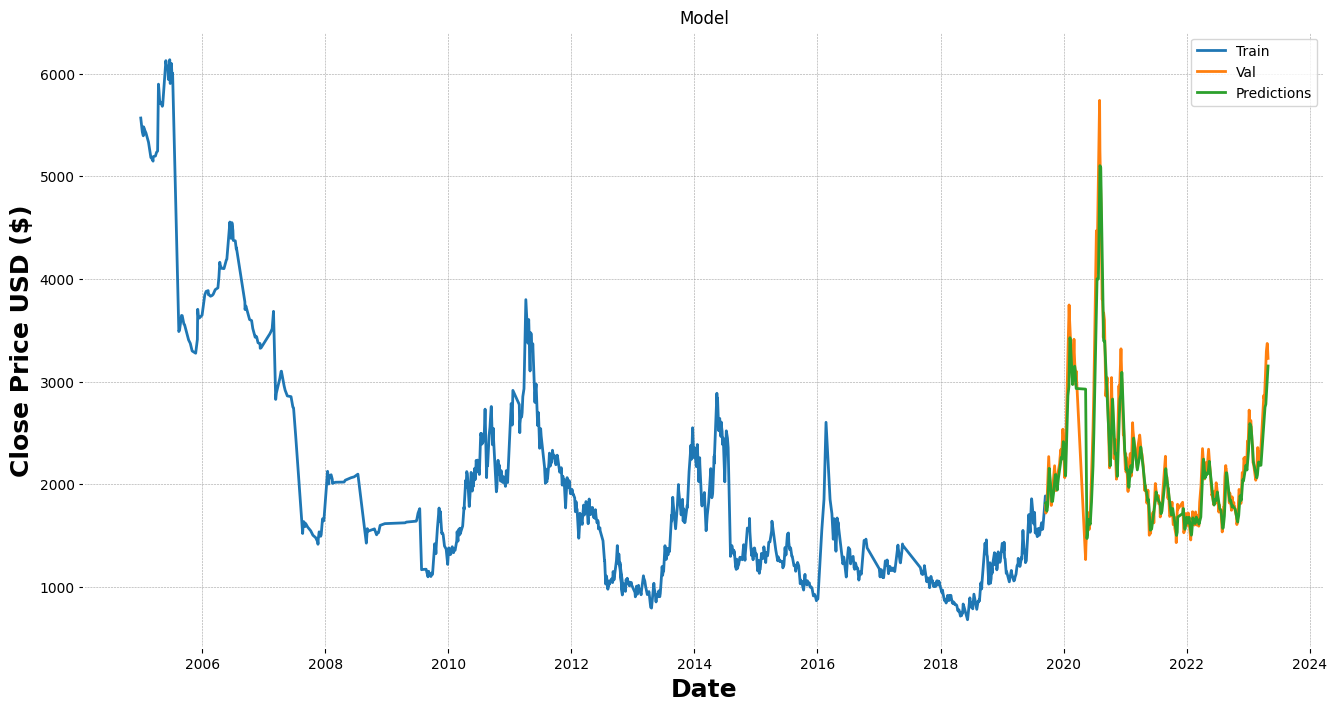

In [168]:
#Plot the data



train=data[:trainingDataLen]
valid=data[trainingDataLen:]
valid['Predictions']=predictions
plt.figure(figsize=(16,8))
plt.title('Model')
plt.xlabel('Date',fontsize=18)
plt.ylabel('Close Price USD ($)' , fontsize=18)
plt.plot(train['<CLOSE>'])
plt.plot(valid[['<CLOSE>', 'Predictions']])
plt.legend(['Train', 'Val', 'Predictions'], loc='upper right')
plt.show()

In [169]:
# aapl = pdr.get_data_yahoo('AAPL', start='2012-01-01', end='2019-12-17')
df = pd.read_csv('S_Saipa.csv',index_col='<DTYYYYMMDD>', parse_dates=True)
df = df.sort_index()
finalData = df.tail(1)
df = df.drop(finalData.index)
# Create a new data frame
new_df=df.filter(['<CLOSE>'])


# Get the last 60 day Closing price values and convert the dataframe to an array

# last_60_days=new_df[-60:].values

last_60_days = new_df.tail(60).values

# Scale the data to be values between 0 and 1

last_60_days_scaled=scalar.transform(last_60_days)
  
# Create an empty list

X_test=[]

X_test.append(last_60_days_scaled)

# Convert the numpy array

X_test=np.array(X_test)

# Reshape the data
X_test=np.reshape(X_test,(X_test.shape[0],X_test.shape[1],1))

pred_price=model.predict(X_test)

# Get the predicted scalar price
pred_price=scalar.inverse_transform(pred_price)

print(pred_price)



1/1 [==============================] - 0s 37ms/step
[[3152.4656]]


In [170]:
print(finalData['<CLOSE>'])

<DTYYYYMMDD>
2023-04-29    3227.0
Name: <CLOSE>, dtype: float64
